## Обзор моделей прогнозирования на основе временных рядов ##

1. Регрессионные модели прогнозирования:
* Простая линейная регрессия (linear regression);
* Множественная регрессия (multiple regression);
* Нелинейная  регрессия (nonlinear regression);
2. Авторегрессионные модели прогнозирования:
* ARIMAX (autoregression integrated moving average extended);
3. Модели экспоненциального сглаживания (ES):
* Экспоненциальное сглаживание (exponential smoothing) (Модель Брауна);
* Модель Хольта;
* Модель Хольта-Винтерса;
4. Модель по выборке максимального подобия (MMSP);
5. Модель на нейронных сетях (ANN);
6. Модель на цепях Маркова (Markov chains);
7. Модель на классификационно-регрессионных деревьях (CART);
8. Модель на основе генетического алгоритма (GA);
9. Модель на опорных векторах (SVM);
10. Модель на основе передаточных функций (TF);
11. Модель на нечётной логике (FL);
12. Модель сингулярного спектрального анализа (SSA); 
13. Модель локальной аппроксимации (LA);
14. Модель фрактальных временных рядов;
15. Модель на основе Вейвлет-преобразования;
16. Модель на основе Фурье-преобразования.

## Подготовка данных 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv('data1.csv', parse_dates=['Year'])

num_train = 200 
num_val = 20
num_test = len(data) - (num_train + num_val)

train = data.iloc[:num_train, 1:].values 
val = data.iloc[num_train:num_train+num_val, 1:].values
test = data.iloc[-num_test:, 1:].values

print('TRAIN shape: {}'.format(train.shape))
print('VAL shape: {}'.format(val.shape))
print('TEST shape: {}'.format(test.shape))

TRAIN shape: (200, 4)
VAL shape: (20, 4)
TEST shape: (61, 4)


## 1. Регрессионные модели прогнозирования

### Простая линейная регрессия
Использует линейную функцию для прогнозирования значения целевой переменной $Y_i$, содержащий в функции только одну независимую переменную $X_i$.

Формула: $Y_i = B_0 + B_1X_i + E_i$, где:

* $B_0$ - это сдвиг (длина отрезка отсекаемого на координатной оси прямой Y),
* $B_1$ - наклон прямой Y, 
* $E_i$ - случайная ошибка переменной Y в i-ом наблюдении.

Подготовка данных:

In [3]:
x_train, y_train = [], []
x_test, y_test = [], []

for i, value in enumerate(train):
    if i%2 == 0:
        x_train.append(value)
    else:
        y_train.append(value)

for i, value in enumerate(test):
    if i%2 == 0:
        x_test.append(value)
    else:
        y_test.append(value)
        
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

Для работы с регрессионными моделями можно воспользоваться бибилиотекой sklearn, где уже реадизованы нужные нам инструменты.

In [4]:
from sklearn.linear_model import LinearRegression

Создаём модель, обучаем, смотрим полученные коэффициенты:

In [5]:
model_LR = LinearRegression() # Создание модели 
model_LR.fit(x_train[:, 0].reshape(-1, 1), y_train[:, 0]) # Обучение модели

print('B0: {}'.format(model_LR.intercept_))
print('B1: {}'.format(model_LR.coef_))

B0: 28.93003694880963
B1: [0.9964859]


Тестирование моделии, высчитывание ошибки и построение графика:

MSE: 147028.93391757976
MAE: 295.06074836119024
RMSE: 383.4435211573926


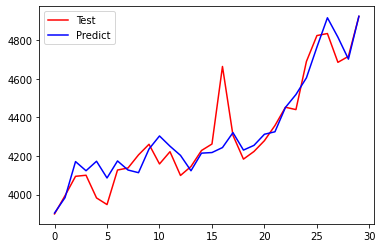

In [6]:
predict = model_LR.predict(x_test[:-1, 0].reshape(-1, 1))
diff = predict - y_test[:, 0].reshape(-1, 1)

# высчитываем ошибки:
print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

plt.plot(range(len(predict)), y_test[:, 0].reshape(-1, 1), label='Test', color='red')
plt.plot(range(len(predict)), predict, label='Predict', color='blue')
plt.legend()
plt.show()


### Множественная линейная регрессия
Использует линейную функцию для прогнозирования значений целевой переменной $Y_i$, содержащий функцию $N$ независимых переменных $X = [X_1, X_2, ..., X_n]$

Формула: $Y_i = B_0 + B_1X_1 + B_2X_2 + ... + B_nX_n + E_i$, где:

* $B_0$ - это сдвиг (длина отрезка отсекаемого на координатной оси прямой Y),
* $B_1 ... B_n$ - коэффициенты для независимых переменных,
* $N$ - кол-во независимых переменных,
* $E_i$ - случайная ошибка переменной Y в i-ом наблюдении.

Создание модели, обучение и просмотр коэффициентов:

In [7]:
model_MLR = LinearRegression() # Создание модели 
model_MLR.fit(x_train, y_train[:, 0]) # Обучение модели

print('B0: {}'.format(model_MLR.intercept_))
print('B1: {}'.format(model_MLR.coef_))

B0: 267.0330936471619
B1: [ 0.92841159  1.43502494 -4.2385526   0.07431214]


MSE: 10921.394874100546
MAE: 66.24034851898391
RMSE: 104.50547772294306


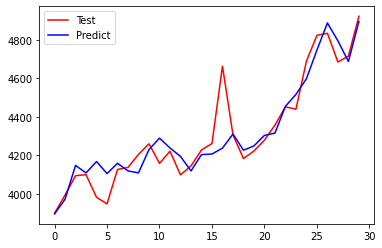

In [8]:
predict = model_MLR.predict(x_test[:-1, :])
diff = predict - y_test[:,0]

# высчитываем ошибки:
print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

plt.plot(range(len(predict)), y_test[:, 0].reshape(-1, 1), label='Test', color='red')
plt.plot(range(len(predict)), predict, label='Predict', color='blue')
plt.legend()
plt.show()

### Нелинейная регрессия 
Это вид регрессионного анализа, в котором экспериментальные данные моделируются функцией, являющейся нелинейной комбинацией параметров модели и зависящей от одной и более независимых переменных.

Примером будет являться динамика роста населения страны со временем. Зависимость численности населения от времени часто описывается с помощью следующей формулы:

$pop =\frac{C}{1 + e^{a+bt}}$

Эту связь нельзя перевести в линейную форму.

## Вывод по регрессионым моделям

Регрессионный анализ обычно используется в исследованиях для определения наличия корреляции между переменными. Использование модели прямолинейной регрессии позволит определить существует ли связь между переменными в наименьшей степени.

## 2. Авторегрессионные модели прогнозирования 

### Источники используемой литературы:
https://wiki.loginom.ru/articles/autoregressive-model.html

https://365datascience.com/tutorials/python-tutorials/arimax/

https://www.mbureau.ru/tag/arimax

Авторегрессионная модель - модель временных рядов, в которой значения временного ряда в данный момент линейно зависят от предыдущих значений этого же ряда. Авторегрессионный процесс порядка $p$ ($AR(p)$ - процесс) определяется следующим образом:

$X_t = C + \sum\limits_{i=1}^n(a_iX_{t-i}) + E_t$, где:

* $a_1, ..., a_p$ - парамметры модели (коэффициенты авторегрессии),
* $C$ - постоянная (часто для упрощения предполагается равной нулю), 
* $E_t$ - состовляющая, отражающая вероятностный характер модели.

Самый лёгкий способ определения коэффициентов - это использование метода наименьших квадратов. Зная параметры модели и соответствующие ретроспективные (предыдущие) значения временного ряда, мы можем предсказать его будущие значения. Поэтому основное назначение авторегрессионной модели - прогнозирование. Кроме этого, с её помощью можно производить анализ временных рядов - выевлять тенденции, сезонность и другие особенности.

### ARIMAX (AutoRegressive Integrated Moving Average eXtended)
Это математическая модель для анализа временных рядов, объединяющая в себе интегрированную авторегрессию, скользящее среднее и возможность учёта дополнительных (внешних факторов).

Из чего состоит модель ARIMAX:
1. AR - авторегрессия: 

Была разобрана ранее.

2. I - интеграция:

Для более точного и удобного прогнозирования временного ряда $X_t$, нужно брать не само значение процесса $X_t$, а только его изменение. То есть на первом этапе мы из исходного временного ряда $X_t$ получаем $\overline{X}_t$, который является разностью соседних значений: $\overline{X}_t=X_t - X_{t-1}$. Далее, мы работаем уже с полученным рядом $\overline{X}_t$ и определяем будущее значение не $X_{t+1}$, а $\overline{X}_{t+1}$ с использованием авторегрессии.

Почему операция называется integrated, то есть интегрированнием? Приведённая разность является обратной операцией, однако при использовании такого подхода для получения в конечном итоге будущего значения искомого временного ряда $\hat{X}_{t+1}$ необходимо суммировать $\hat{X}_{t+1}=X_t + \overline{X}_{t+1}$, то есть к текущему значению процесса прибавлять спрогнозированную разность. Так как суммировать в итоге нужно единожды, то говорят об интеграции первого порядка.

3. MA - скользящее среднее:

Модель скользящего среднего - вещь совершенно не сложная, однако, как и все остальные прогнозирования или их составляющие, имеет ньюансы, но сейчас не о них, а о идеи модели. Часто случается, что в исследуемом процессе имеются выбросы. Как правило, они весьма сложно исследуются. Очевидно, что подобные выбросы дурно влияют на ближайшие к ним прогнозные значения.

Для сглаживания пиков (выбросов) применяется модель скользящего среднего, которая, по сути дела представляет собою простой фильтр низких частот.

Скользящее среднее второго порядка, которое принято обозначать как $MA(2)$ для временного ряда $X_t$ вычисляется следующим образом: $\overline{X}_t=\frac{1}{2}(X_t + X_{t-1})$.

Скользящее среднее третьего поряка вычисляется аналогично: $\overline{X}_t=\frac{1}{3}(X_t + X_{t-1} + X_{t-2})$.

Таким образом, для скользящего среднего порядка $p$ легко написать следующую формулу: $\overline{X}_t=\frac{1}{p}(X_t + X_{t-1} + ... + X_{t-p+1})$

Таким образом, ясно, что скользящее среднее представляет собой фильтр, который позволяет сглаживать выбросы временного ряда, которые, в свою очередь, спрогнозировать достаточно сложно или вовсе невозможно.

4. X - расширение:

Целью расширения модели прогнозирования является добавление в неё учёта внешних факторов. Если же нам нужно добавить в модель учёт, например, двух показателей представленных в виде временных рядов $Y_t, Z_t$, то выражение авторегрессии будет иметь вид: $X_t=C + \sum\limits_{i=1}^p(a_iX_{t-i}) + a_IY_t + a_{II}Z_t$. Мы видим, что в линейную комбинацию добавленны два члена (их называют регрессорами), которые позволяют учёт значений рассматриваемых внешних факторов. Коэффициент данной линейной регрессии находится аналогичным образом при помощи метода наименьших квадратов для набора уравнений.

Важно отметить, что в моделях прогнозирования внешние факторы, то есть показатели $Y_t$ и $Z_t$ должны учитываться в соответствующий момент времени. Если мы прогнозируем временной ряд $X_t$ на завтра, то нам нужно иметь под рукой значения внешних факторов $Y_t$ и $Z_t$ на то же самое завтра, иначе модель будет работать некорректно.

Большое число внешних факторов в модели прогнозирования является неверным решением. Каждый внешний фактор несёт в себе ошибку собственного прогноза и эта ошибка может быть большой, а потому самым негативным образом сказаться на точности прогнозирования искомого временного ряда. В авторегрессионных моделях прогнозирования следует учитывать не более 3 внешних факторов. В нейросетевых моделях иногда берут до 5.

#### Реализация, через библиотеку statsmodels:

predicted=4114.982051, expected=4058.060000, index=0
predicted=4039.581273, expected=3943.760000, index=1
predicted=4060.876624, expected=4081.750000, index=2
predicted=3901.315294, expected=4201.150000, index=3
predicted=4109.089996, expected=4081.610000, index=4
predicted=4244.846697, expected=4071.030000, index=5
predicted=4053.517973, expected=4099.680000, index=6
predicted=4098.092296, expected=4063.860000, index=7
predicted=4076.602166, expected=4147.860000, index=8
predicted=4049.433851, expected=4020.860000, index=9
predicted=4175.867007, expected=4033.100000, index=10
predicted=3996.891688, expected=4036.620000, index=11
predicted=4016.269818, expected=4064.470000, index=12
predicted=4036.731681, expected=4175.480000, index=13
predicted=4075.690550, expected=3991.300000, index=14
predicted=4205.099618, expected=4247.040000, index=15
predicted=3964.984045, expected=4091.710000, index=16
predicted=4286.526431, expected=4160.330000, index=17
predicted=4067.747086, expected=4037.9

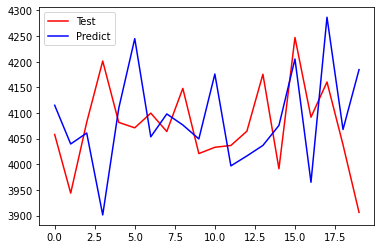

In [9]:
from statsmodels.tsa.arima.model import ARIMA  


history = x_train # переменная для накопления входных данных
predictions = []  # переменная для накопления предсказанных значений

# предсказание:
for t in range(num_val):
    model_ARIMAX = ARIMA(history[:, 0], exog=history[:, 1:3], order=(1,1,1)) 
    model_fit = model_ARIMAX.fit()
    output = model_fit.predict()
    yhat = output[-1]
    predictions.append(yhat)
    obs,y = val[t, 0], t
    history = np.vstack((history, val[t, :]))
    print('predicted=%f, expected=%f, index=%s' % (yhat, obs, y))

# высчитываем разницу:
diff = predictions - val[:,0]

# высчитываем ошибки:
print("MSE:", np.mean(diff**2))
print("MAE:", np.mean(abs(diff)))
print("RMSE:", np.sqrt(np.mean(diff**2)))

# построение графика:
plt.plot(range(len(predictions)), val[:, 0].reshape(-1, 1), label='Test', color='red')
plt.plot(range(len(predictions)), predictions, label='Predict', color='blue')
plt.legend()
plt.show()

## Вывод по авторегрессионным моделям

Авторегрессионные модели отлично подходят в качестве инструментов для прогнозирования временных рядов. Являются достаточно популярными и востребованными, имеют множество вариаций для каждого типа задач.

## 3. Модели экспоненциального сглаживания (ES)

### Источники используемой литературы:
http://www.machinelearning.ru/wiki/index.php?title=%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%81%D0%B3%D0%BB%D0%B0%D0%B6%D0%B8%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5

https://help.fsight.ru/ru/mergedProjects/lib/02_time_series_analysis/uimodelling_expsmooth.htm

Экспоненциальное сглаживание является одним из наиболее распространённых приёмов, используемых для сглаживания временных рядов, а также для прогнозирования. В основе процедуры сглаживания лежит расчёт экспоненциальных скользящих средних сглаживаемого ряда. Главное достоинство прогнозной модели, основанной на экспоненциальных средних, состоит в том, что она способна последовательно адаптироватся к новому уровню процесса без значительного реагирования на случайные отклонения.

### Экспоненциальное сглаживание (exponential smoothing) (Модель Брауна)

Исторически метод независимо был разработан Брауном и Хольтом. Хольт также разработал модель экспоненциального сглаживания для процессов с постоянным уровнем, процессов с линейным ростом и процессов с сезонными эффектами. Процедура простого экспоненциального сглаживания (Модель Брауна) осуществляется по следующим формулам:

$
\begin{equation*}
 \begin{cases}
   L_1 = X_0 \\
   L_t = \alpha X_{t-1} + (1 - \alpha)L_{t-1}
 \end{cases}
\end{equation*}
$, где:

* $X_{t-1}$ - Фактическое наблюдение в момент $t-1$,
* $L_t$ - Значение экспоненциального среднего в момент $t$,
* $\alpha$ - Параметр сглаживания, $\alpha=const, \alpha\in(0;1]$.

Экспоненциальное среднее в момент $t$ здесь выражено как взвешенная сумма текущего наблюдения и экспоненциального среднего прошлого наблюдения с весами $\alpha$ и $(1-\alpha)$ соответственно. Если последоваельно использовать данное рекурреннтное соотношение, то значение $L_t$ можно выразить через значения временного ряда $X$:

$L_t = \alpha*\sum\limits_{i=1}^t(1-\alpha)^i * X_{t-i}$

Таким образом, величина $L_t$ оказывается взвешенной суммой всех членов ряда. Причём значения весов уменьшаются экспоненциально в зависимости от удалённости наблюдения относительно момента $t$. Это объесняет название "экспоненциальное среднее".

В общем виде рекуррентная формула экспоненциального сглаживания записывается следующим образом: $L_t=\alpha d_1 + (1 - \alpha)d_2$, где множители $d_1$ и $d_2$ определяют в зависимоти от выбранной модели сглаживания. К примеру, при простом экспоненциальном сглаживании, рассмотренном выше: $d_1=X_t, d_2=L_{t-1}$.

#### Реализация:

In [35]:
class Model_Brown_ES(): 
    def __init__(self, time_series, alpha):
        self.time_series = time_series  # Выборка
        self.alpha = alpha              # Коэффициент сглаживания ряда
        self.l_t = time_series[0]       # Сглаженная величина(для первого элемента всегда равна первому элементу выборки)
        self.index = 0                  # Внутренний счётчик
        self.test_predict = []          # Массив для сбора тестовых предсказаций
        self.prediction = []            # Массив для предсказаний
    
    def _func(self, alpha, l_t, index):  # Функция рассчёта экспоненциально-сглаженного ряда
        if len(self.time_series) > self.index:
            l_t = alpha * self.time_series[index] + (1 - alpha)*l_t
        else:
            l_t = alpha * l_t + (1 - alpha)*l_t
            
        return l_t
    
    def _update(self):  # Обнуление данных 
        self.test_predict = []
        self.prediction = []
        self.index = 0
        self.l_t = self.time_series[0]
    
    def fit(self):  # Обучение и накопление тестовых значений
        self._update()
        
        while len(self.time_series) > self.index:
            self.l_t = self._func(self.alpha, self.l_t, self.index)
            self.index += 1
            self.test_predict.append(self.l_t)
            
        self.test_predict = np.array(self.test_predict)
        print('[MODEL:fit] OK')
    
    def predict(self, count=1):  # Предсказываение, минимальное кол-во 1
        out_len = self.index + count
        
        while self.index != out_len:
            self.l_t = self._func(self.alpha, self.l_t, self.index)
            self.index += 1
            self.prediction.append(self.l_t)
            
        self.prediction = np.array(self.prediction)
        print('[MODEL:predict] OK')
    
    def show_result_test(self):  # Вывод информации по тестовому предсказанию: ошибка, график
        # Смотрим получившиеся размерности:
        print('Time series shape: {}'.format(self.time_series.shape))
        print('Test predict shape: {}'.format(self.test_predict.shape))
        
        # высчитываем разницу:
        diff = self.test_predict - self.time_series
        
        # высчитываем ошибки:
        print("MSE:", np.mean(diff**2))
        print("MAE:", np.mean(abs(diff)))
        print("RMSE:", np.sqrt(np.mean(diff**2)))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.test_predict)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.test_predict)), self.test_predict, label='Predict', color='blue')
        plt.legend()
        plt.show()
    
    def show_result_final(self):  # Вывод по результатам предсказания
        print('Prediction: {}'.format(self.prediction))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.time_series)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.time_series), self.index), self.prediction, label='Predict', color='blue')
        plt.legend()
        plt.show()

[MODEL:fit] OK
[MODEL:predict] OK
Time series shape: (200,)
Test predict shape: (200,)
MSE: 3283.273347280657
MAE: 40.10271781941534
RMSE: 57.29985468812863


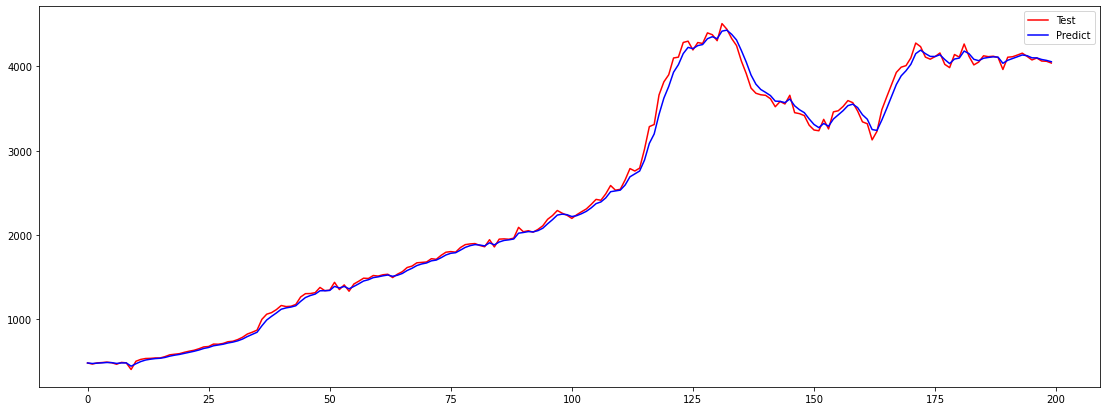

Prediction: [4055.85045417 4055.85045417 4055.85045417 4055.85045417 4055.85045417
 4055.85045417]


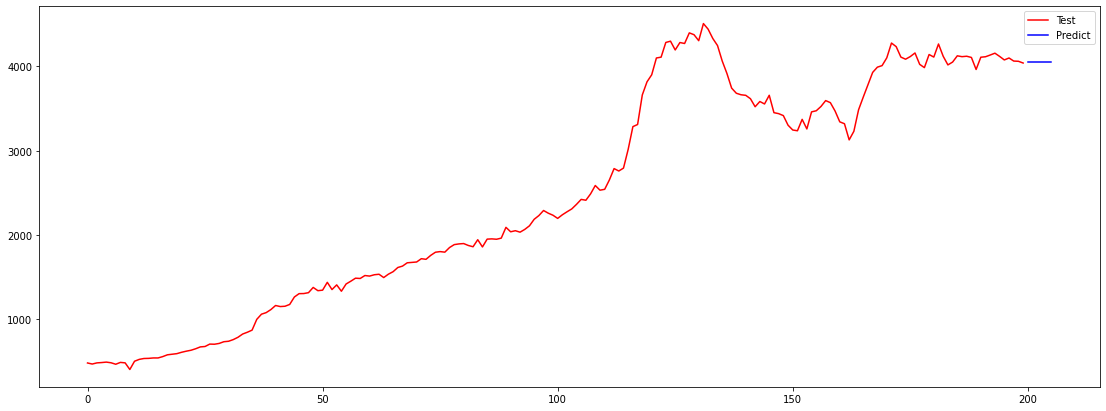

In [36]:
model_Brown = Model_Brown_ES(train[:, 0], 0.5)

model_Brown.fit()                # Обучение
model_Brown.predict(6)           # Предсказание
model_Brown.show_result_test()   # Вывод тестового результата
model_Brown.show_result_final()  # Вывод итогового результата

### Модель Хольта

Это модель прогнозирования, предоставляющая динамику временного ряда как линейную зависимость.

$L_t = \alpha Y_t + (1 - \alpha)(L_{t-1} + T_{t-1})$ - сглаживает экспоненциальный ряд,

$T_t = \beta(L_t - L_{t-1}) + (1 - \beta)T_{t-1}$ - определяем значение тренда, где:

* $\alpha$ - коэффициент сглаживания ряда от 0 до 1,
* $\beta$ - коэффициент сглаживания тренда от 0 до 1,
* $Y_t$ - текуще значение,
* $L_t$ - сглаженная величина на текущий период,
* $T_t$ - значение тренда,
* $L_1=Y_1$, $T_1=0$ или $T_1=Y_2-Y_1$.

Модель рассчитывает пронозы с истёкшим сроком, то есть те, которые относятся к периоду в котором фактическое значение уже было реализовано, и реальные прогнозы на период, который ещё не произошёл:

$Y_t^* = L_{t-1} + T_{t-1}$ - истёкший прогноз

$\hat{Y}_t = L_n + (T-n)T_n$ - реальный прогноз, где $T=n+1, T=n+2, ...$

Важной проблемой является выбор коэффициенттов, которые определяют чувствительность модели. Чувствительная модель быстро реагирует на реальные изменения, а не чувствительная не реагирует на шум и случайные отклонения. Учитываются лишь линейные тренды. Не учитывается сезонность.

In [33]:
class Model_Holt_ES(): 
    def __init__(self, time_series, alpha, beta):
        self.time_series = time_series  # Выборка
        self.alpha = alpha              # Коэффициент сглаживания ряда
        self.beta = beta                # Коэффициент сглаживания тренда
        self.l_t = time_series[0]       # Сглаженная величина(для первого элемента всегда равна первому элементу выборки)
        self.t_t = 0                    # Значение тренда 
        self.l_previos = 0              # Предыдущее значение сглаженной величины
        self.index = 0                  # Внутренний счётчик
        self.test_predict = []          # Массив для сбора тестовых предсказаций
        self.prediction = []            # Массив для предсказаний
    
    def _func_ES(self, alpha, l_t, t_t, index):  # Функция рассчёта экспоненциально-сглаженного ряда
        if len(self.time_series) > self.index:
            l_t = alpha * self.time_series[index] + (1 - alpha)*(l_t + t_t)
        else:
            l_t = alpha * l_t + (1 - alpha)*(l_t + t_t)
            
        return l_t
    
    def _func_trend(self, beta, l_t, t_t, l_previos):  # Функция рассчёта тренда
        t_t = beta * (l_t - l_previos) + (1 - beta) * t_t
        return t_t
    
    def _update(self):  # Обнуление данных 
        self.test_predict = []
        self.prediction = []
        self.index = 0
        self.l_t = self.time_series[0]
        self.t_t = 0
        self.l_previos = 0
    
    def fit(self):  # Обучение и накопление тестовых значений
        self._update()
        
        while len(self.time_series) > self.index:
            self.l_previos = self.l_t
            self.l_t = self._func_ES(self.alpha, self.l_t, self.t_t, self.index)
            self.t_t = self._func_trend(self.beta, self.l_t, self.t_t, self.l_previos)
            self.index += 1
            self.test_predict.append(self.l_t + self.t_t)
            
        self.test_predict = np.array(self.test_predict)
        print('[MODEL:fit] OK')
    
    def predict(self, count=1):  # Предсказываение, минимальное кол-во 1
        out_len = self.index + count
        
        while self.index != out_len:
            self.l_previos = self.l_t
            self.l_t = self._func_ES(self.alpha, self.l_t, self.t_t, self.index)
            self.t_t = self._func_trend(self.beta, self.l_t, self.t_t, self.l_previos)
            self.index += 1
            self.prediction.append(self.l_t + self.t_t)
            
        self.prediction = np.array(self.prediction)
        print('[MODEL:predict] OK')
    
    def show_result_test(self):  # Вывод информации по тестовому предсказанию: ошибка, график
        # Смотрим получившиеся размерности:
        print('Time series shape: {}'.format(self.time_series.shape))
        print('Test predict shape: {}'.format(self.test_predict.shape))
        
        # высчитываем разницу:
        diff = self.test_predict - self.time_series
        
        # высчитываем ошибки:
        print("MSE:", np.mean(diff**2))
        print("MAE:", np.mean(abs(diff)))
        print("RMSE:", np.sqrt(np.mean(diff**2)))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.test_predict)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.test_predict)), self.test_predict, label='Predict', color='blue')
        plt.legend()
        plt.show()
    
    def show_result_final(self):  # Вывод по результатам предсказания
        print('Prediction: {}'.format(self.prediction))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.time_series)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.time_series), self.index), self.prediction, label='Predict', color='blue')
        plt.legend()
        plt.show()

[MODEL:fit] OK
[MODEL:predict] OK
Time series shape: (200,)
Test predict shape: (200,)
MSE: 4148.210172441522
MAE: 42.558559024630014
RMSE: 64.40660037947603


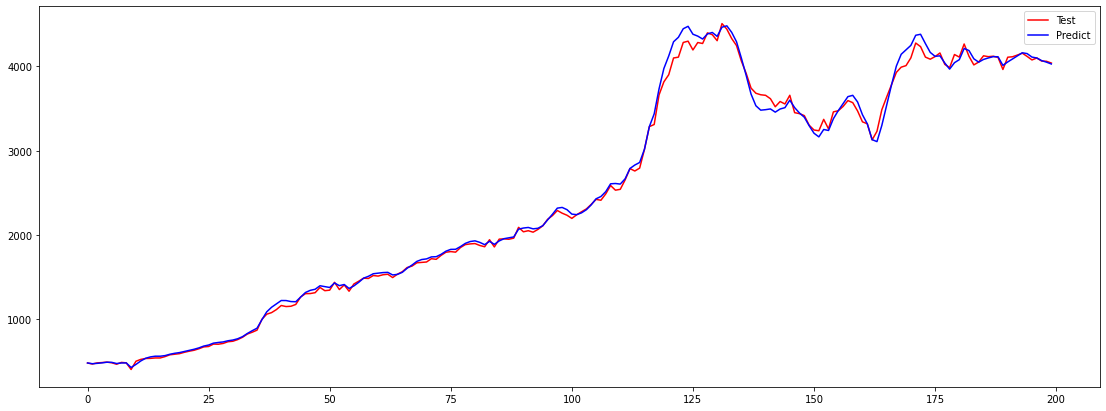

Prediction: [4023.8251238  4019.86337291 4016.6939722  4014.15845163 4012.13003517
 4010.50730201]


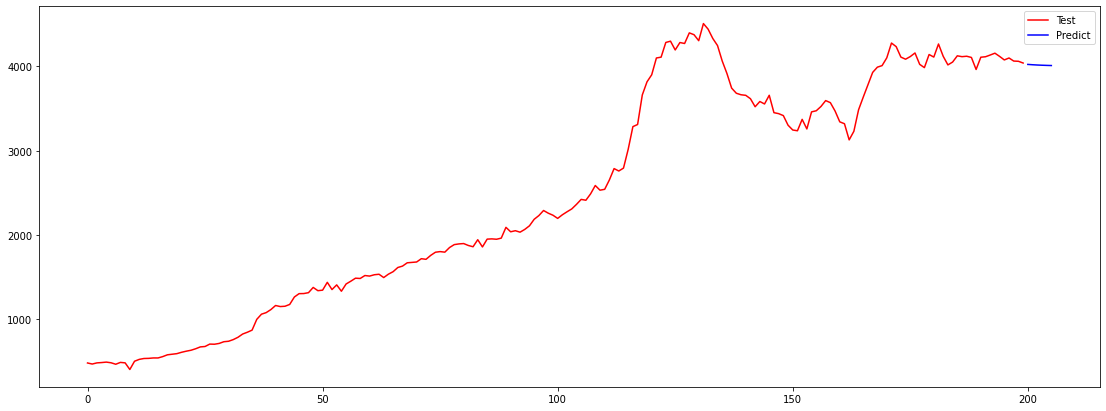

In [88]:
model_Holt = Model_Holt_ES(time_series=train[:, 0], alpha=0.5, beta=0.4)

model_Holt.fit()                # Обучение
model_Holt.predict(6)           # Предсказание
model_Holt.show_result_test()   # Вывод тестового результата
model_Holt.show_result_final()  # Вывод итогового результата

### Модель Хольта-Винтерса

https://4analytics.ru/prognozirovanie/prognoz-po-metodu-eksponencialnogo-sglajivaniya-s-trendom-i-sezonnostyu-xolta-vintersa.html

Данная модель используется для прогнозирования временных рядов, когда в структуре данных есть сложившийся тренд и сезонность. Модель прогноза Хольта-Винтерса - это 3-ёх параметрическая модель прогноза, которая учитывает:

1. Сглажеженный экспоненциальный ряд,
2. Тренд,
3. Сезонность.

Этапы просчёта прогноза по модели Хольта-Винтерса:

1. Рассчитываем экспоненциально-сглаженный ряд:

$L_t = \frac{\alpha*Y_t}{S_{t-s}} + (1 - \alpha)(L_{t-1} + T_{t-1})$, где:
* $L_t$ - сглаженная величина на текущий период,
* $\alpha$ - коэффициент сглаживания ряда,
* $S_{t-s}$ - коэффициент сезонности предыдущего периода,
* $Y_t$ - текущее значение ряда,
* $L_{t-1}$ - сглаженная величина за предыдущий период,
* $T_{t-1}$ - значение тренда за предыдущий период.

Коэффициент сглаживания ряда $\alpha$ задаётся вами в ручную и находится в диапазоне от 0 до 1. Для первого периода в начале данных экспоненциально-сглаженный ряд равен первому значения ряда $L_1=Y_1$. Сезонность в первом и втором периоде равна $S_{t-s}=1$.

2. Определяем значение тренда:

$T_1 = \beta(L_t - L_{t-1}) + (1 - \beta)T_{t-1}$, где:
* $T_t$ - значение тренда на текущий период,
* $\beta$ - коэффициент сглаживания тренда,
* $L_t$ - экспоненциально-сглаженная величина за текущий период,
* $L_{t-1}$ - экспоненциально-сглаженная величина за предыдущий период,
* $T_{t-1}$ - значения тренда за предыдущий преиод.

Коэффициент сглаживания тренда $\beta$ задаётся вами вручную и находится в диапазоне от 0 до 1. Значения тренда для первого периода равно 0 ($T_1=0$).

3. Оцениваем сезонность:

$S_t=\frac{\gamma*Y_t}{L_t} + (1 - \gamma)S_{t-s}$, где:
* $S_t$ - коэффициент сезонности для текущего периода,
* $\gamma$ - коэффициент сглаживания сезонности,
* $Y_t$ - текущее значение ряда,
* $L_t$ - сглаженная величина за текущий период,
* $S_{t-s}$ -коэффициент сезонности за этот же период в предыдущем сезоне.

Коэффициент сглаживания сезонности $\gamma$ задаётся вручную и находится в диапазоне от 0 до 1. Коэффициент сезонности для первого сезона = 1.

4. Прогноз:

Прогноз на $p$ периодов равен: $\hat{Y}_{t+p} = (L_t + pT_t)S_{t-s+p}$, где:
* $\hat{Y}_{t+p}$ - прогноз по модели Хольта-Винтерса на $p$ периодов вперёд,
* $L_t$ - экспоненциально-сглаженная величина за последний период,
* $p$ - порядковый номер периода, на который сделан прогноз,
* $T_t$ - тренд на последний период;
* $S_{t-s+p}$ - коэффициент сезонности за этот же период в последнем сезоне.

При появлении новых данных прогноз по модели Хольта-Винтерса желательно пересчитать для уточнения ряда, тренда и сезонности. Также при подготовки данных для прогноза всегда стоит очищать данные от факторов, которые в прогнозном периоде не повторяются (например, прирост продаж по крупной акции) или учитывать запланированные факторы, которые дадут дополнительный прирост продаж (например, ввод продукции в сеть или приведение мероприятии по стимулированию сбыта).

In [31]:
class Model_Holt_Vinters_ES(): 
    def __init__(self, time_series, alpha, beta, gama):
        self.time_series = time_series  # Выборка
        self.alpha = alpha              # Коэффициент сглаживания ряда
        self.beta = beta                # Коэффициент сглаживания тренда
        self.gama = gama                # Коэффициент сезонности
        self.l_t = time_series[0]       # Сглаженная величина(для первого элемента всегда равна первому элементу выборки)
        self.l_previos = 0              # Предыдущее значение сглаженной величины
        self.t_t = 0                    # Значение тренда 
        self.s_t = 1                    # Значение сезонности
        self.index = 0                  # Внутренний счётчик
        self.test_predict = []          # Массив для сбора тестовых предсказаций
        self.prediction = []            # Массив для предсказаний
    
    def _func_ES(self, alpha, l_t, t_t, s_t, index):  # Функция рассчёта экспоненциально-сглаженного ряда
        if len(self.time_series) > self.index:
            l_t = alpha * self.time_series[index] / s_t + (1 - alpha)*(l_t + t_t)
        else:
            l_t = alpha * l_t / s_t + (1 - alpha)*(l_t + t_t)
            
        return l_t
    
    def _func_trend(self, beta, l_t, t_t, l_previos):  # Функция рассчёта тренда
        t_t = beta * (l_t - l_previos) + (1 - beta) * t_t
        return t_t
    
    def _func_season(self, gama, l_t, s_t, index):  # Функция рассчёта сезонности
        if len(self.time_series) > self.index:
            s_t = gama * self.time_series[index] / l_t + (1 - gama) * s_t
        else:
            s_t = gama * l_t / l_t + (1 - gama) * s_t
            
        return s_t
    
    def _update(self):  # Обнуление данных 
        self.test_predict = []
        self.prediction = []
        self.l_t = self.time_series[0]
        self.l_previos = 0       
        self.t_t = 0             
        self.s_t = 1             
        self.index = 0           
    
    def fit(self):  # Обучение и накопление тестовых значений
        self._update()
        
        while len(self.time_series) > self.index:
            self.l_previos = self.l_t
            self.l_t = self._func_ES(self.alpha, self.l_t, self.t_t, self.s_t, self.index)
            self.t_t = self._func_trend(self.beta, self.l_t, self.t_t, self.l_previos)
            self.s_t = self._func_season(self.gama, self.l_t, self.s_t, self.index)
            self.index += 1
            self.test_predict.append((self.l_t + self.t_t)*self.s_t)
            
        self.test_predict = np.array(self.test_predict)
        print('[MODEL:fit] OK')
    
    def predict(self, count=1):  # Предсказываение, минимальное кол-во 1
        out_len = self.index + count
        
        while self.index != out_len:
            self.l_previos = self.l_t
            self.l_t = self._func_ES(self.alpha, self.l_t, self.t_t, self.s_t, self.index)
            self.t_t = self._func_trend(self.beta, self.l_t, self.t_t, self.l_previos)
            self.s_t = self._func_season(self.gama, self.l_t, self.s_t, self.index)
            self.index += 1
            self.prediction.append((self.l_t + self.t_t)*self.s_t)
            
        self.prediction = np.array(self.prediction)
        print('[MODEL:predict] OK')
    
    def show_result_test(self):  # Вывод информации по тестовому предсказанию: ошибка, график
        # Смотрим получившиеся размерности:
        print('Time series shape: {}'.format(self.time_series.shape))
        print('Test predict shape: {}'.format(self.test_predict.shape))
        
        # высчитываем разницу:
        diff = self.test_predict - self.time_series
        
        # высчитываем ошибки:
        print("MSE:", np.mean(diff**2))
        print("MAE:", np.mean(abs(diff)))
        print("RMSE:", np.sqrt(np.mean(diff**2)))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.test_predict)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.test_predict)), self.test_predict, label='Predict', color='blue')
        plt.legend()
        plt.show()
    
    def show_result_final(self):  # Вывод по результатам предсказания
        print('Prediction: {}'.format(self.prediction))
        
        # построение графика:
        plt.figure(figsize=(19, 7))
        plt.plot(range(len(self.time_series)), self.time_series.reshape(-1, 1), label='Test', color='red')
        plt.plot(range(len(self.time_series), self.index), self.prediction, label='Predict', color='blue')
        plt.legend()
        plt.show()

[MODEL:fit] OK
[MODEL:predict] OK
Time series shape: (200,)
Test predict shape: (200,)
MSE: 2247.767147250825
MAE: 32.7263841611513
RMSE: 47.41062272582828


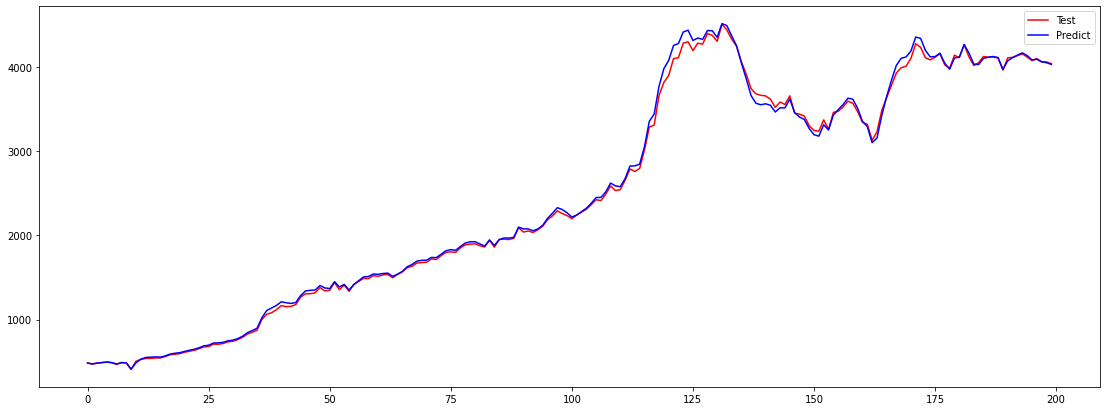

Prediction: [3777.77650165 3640.95114069 3563.15290013 3516.31774511 3486.40123436
 3466.18902097]


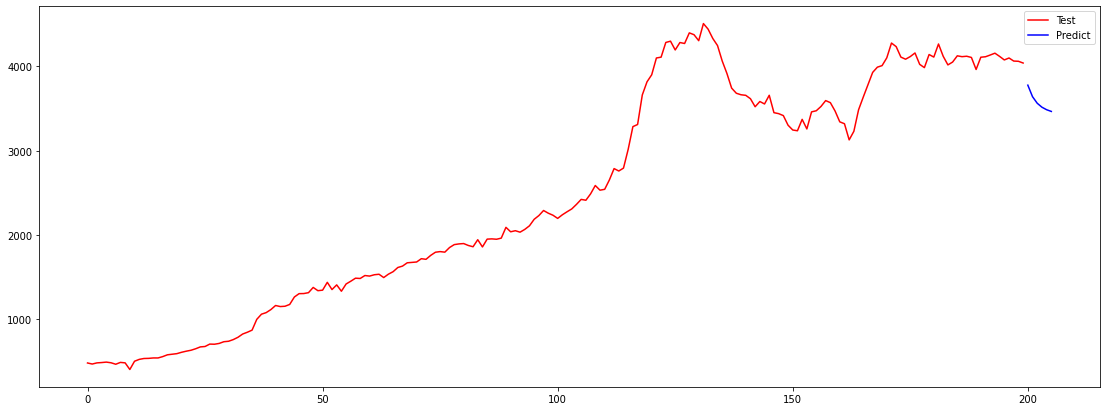

In [38]:
model_Holt_Vinters = Model_Holt_Vinters_ES(time_series=train[:, 0], alpha=0.5, beta=0.4, gama=0.5)

model_Holt_Vinters.fit()                # Обучение
model_Holt_Vinters.predict(6)           # Предсказание
model_Holt_Vinters.show_result_test()   # Вывод тестового результата
model_Holt_Vinters.show_result_final()  # Вывод итогового результата

## Вывод по моделям экспоненциального сглаживания

Модели экспоненциального сглаживания хорошо себя проявили. Имеют простую реализацию, множество преимуществ и с помощью них легко можно выявить сезонность и тренд временных рядов. Единственной проблемой является нецелесообразность прогнозирования на большой промежуток времени, так как быстро накапливает ошибку и из-за этого теряет свои преимущества. Таким образом, можно заключить, что модели экспоненциального сглаживания отлично подходят для анализа и краткосрочного прогнозирования временных рядов.

## 4. Модель по выборке максимального подобия (MMSP)

### Источник используемой литературы:
https://habr.com/ru/post/267035/

В моделе по выборке максимального подобия предполагается, что если история повторяется, то для каждой выборки, предшествующей прогнозу, есть подобная выборка , содержащаяся в фактических значениях этого же ряда. Формально это называется гипотеза подобия. 

В момент времени $T$, который называется моментом прогноза, нужно определить $P$ значений в будущем, то есть вычислить выборку Прогноза. При этом значения Выборки новой истории являются доступными. Далее, исходя из предположения о том, что для каждой выборки есть подобная, нужно найти Выборку максимального подобия для Выборки новой истории и предположить, что история повторится то есть основной для прогнозных значений станет Базовая выборка.

Далее необходимо ответить на три вопроса:

1. Как определить подобие выбора?

Самый простой вариант определения подобия вычисление значения линейной корреляции. Берём одну выборку длины $M$, берём другую выборку длиной $M$, считаем значение корреляции, которое и будет отражать подобие двух выборок. Самое главное, что данный подход не является единственным способом.

2. Как "перенести" изменение свойств?

В связи с тем, что в основу определения подобия заложена линейная корреляция, то самым простым вариантом "перенесения" свойств выборок является линейная зависимость:

$Z_{T-M+1}^M = \alpha_1Z_{msp}^M + \alpha_0$, где:
* $Z_{T-M+1}^M$ - выборка новейшей истории,
* $Z_{msp}^M$ - выборка максимального подобия,
* $\alpha_1, \alpha_0$ - коэффициент.

Если уравнение отражает зависимость двух фактических выборок при помощи коэффициентов $\alpha_1$ и $\alpha_0$, то на основании предположения о подобии Прогноз и Базовая выборка соотносятся следующим образом:

$Z_{T+1}^P = \alpha_1Z_{msp+M}^P + \alpha_0$, где:
* $Z_{T+1}^P$ - прогноз,
* $Z_{msp+M}^P$ - базовая выборка.

Коэффициенты $\alpha_1$ и $\alpha_0$ в обоих уравнениях одинаковые, однако для первого уравнения являются неизвестными и их нужно определить, а для второго уравнения они являются известными. Индекс $msp$ расшифровывается как most similar pattern.

3. Всегда ли подходит предположение о подобии?

Это нужно проверять для каждой новой задачи.

### Реализация:

In [142]:
times = data['Year'][:num_train].dt.month.astype(str).astype('category')
time_series = train[:, 0]

T = '5' # номер месяца c которого будет совершён прогноз
P = 6  # горизонт события
M = 24 # кол-во элементов выборке

index = np.where(times == T)[0] # индексы выбранные по подобию месяца

hist_new_data = time_series[-M:] # выборка новой истории
hist_old_data = [] # массив предназначенный для подобных выборок
new_index = [] # индексы для подобных выборок 

for i in index:  # поиск подобных выборок
    start_index = i - M + 1
    if start_index < 0 or i == index[-1]:
        pass
    else:
        new_index.append(i)
        hist_old_data.append(time_series[start_index:i])   
    
for hist in hist_old_data: # подсчёт корреляции среди выборки новой истории и подобных выборок
    coef_corr.append(np.abs(np.correlate(hist_new_data, hist, 'full')))

max_coef = max(coef_corr[0]) 
index_max_coef = 0

# поиск подходящей выборки
for i, coef in enumerate(coef_corr):
    if max_coef < max(coef):
        max_coef = max(coef)
        index_max_coef = i

print('index_max_coef = {}'.format(index_max_coef))
# MSP = new_index[index_max_coef - 1]

# MSP_data = time_series[MSP-M+1 : MSP]
# hist_base_data = time_series[MSP+1 : MSP+P]

# Xn = MSP_data.transpose() * MSP_data
# Yn = MSP_data.transpose() * hist_new_data[:-1]

# invX = np.linalg.inv(Xn)  # обратная матрица
# A = invX * Yn

# print(A)
# # print(Index)
# # print(np.where(time_series > 0))

index_max_coef = 14


### Вывод по модели выборки максимального подобия:

Основа идеи модели заключается в развитии истории по спирали, то есть этапы повторяются, но с изменяющимися свойствами. Например, временные ряды электроэнергетики: ежедневные данные по использованию электроэнергии в день, разбитые по часам. Поэтому, данную модель можно назвать узконаправленной.

## 5. Модель на нейронных сетях (ANN)

### Tensorflow ###

https://www.tensorflow.org/ - официальный сайт библиотеки tensorflow.

__Tensorflow__ - это комплексная платформа с открытым исходным кодом для машинного обучения. Он имеет всеобъемлющую гибкую экосистему инструментов, библиотек и ресурсов сообщества, которая позволяет исследователям продвигать новейшие технологии машинного обучения, а разработчикам легко создавать и развертывать приложения на основе машинного обучения.

Tensorflow позволяет довольно быстро и просто построить модель машинного с помощью интуетивно понятного и высокоуровнего API, с активных выполнением, что обеспечивает немедленную итерацию модели и простую отладку.

### PyTorch ###

https://pytorch.org/ - официальный сайт фреймворка pytorch.

__Pytorch__ - фреймворк с открытым исходным кодом для машинного обучения. Обеспечивает быстрое и гибкое экспериментирование и эффективное производство благодаря удобному интерфейсу, распределенному обучению и экосистеме инструментов и библиотек.

### Greykite ###

https://linkedin.github.io/greykite/docs/0.1.0/html/index.html - официальный сайт библиотеки Greykite.

__Greykite__ - это библиотека прогнозов, которая позволяет выполнять исследовательский анализ данных (EDA), конвейер прогнозов, настройку модели, сравнительный анализ и тд. Она включает модель Silverkite, модель прогноза, разработанную Linkedin, которая позволяет проектировать функции, автоматически обнаруживать точки изменения, отпуск эффекты, различные методы подгонки машинного обучения, диапазоны статических прогнозов и тд. Модель Silverkite имеет множество предварительно настроенных шаблонов (те. конфигураций параметров), которые подходят для различных частот прогнозов, горизонтов и шаблонов данных. Помимо Silverkite, он также включает интерфейс для модели Prophet, разработанный Facebook.

### Pytorch_forecasting ###

https://pytorch-forecasting.readthedocs.io/en/latest/ - официальный сайт библиотеки Pytorch_forecasting.

__PyTorch Forecasting__ призван упростить прогнозирование современных временных рядов с помощью нейронных сетей как для реальных случаев, так и для исследований. Цель состоит в том, чтобы предоставить высокоуровневый API с максимальной гибкостью для профессионалов и разумными настройками по умолчанию для новичков. В частности, в пакете предусмотрены:

* Класс набора данных таймсерии, который абстрагируется от обработки преобразований переменных, пропущенных значений, рандомизированной подвыборки, нескольких длин истории и тд.
* Базовый класс модели, который обеспечивает базовое обучение моделей таймсерий, а также ведение журнала в тензорной таблице и общие визуализации, такие как фактические прогнозы и графики зависимостей.
* Несколько архитектур нейронных сетей для прогнозирования временных рядов, которые были улучшены для реального развертывания и имеют встроенные возможности интерпретации
* Мульти-горизонтальные метрики таймсерий
* Оптимизатор Ranger для более быстрого обучения модели
* Настройка гиперпараметров с помощью optuna

Пакет построен на PyTorch Lightning, что позволяет обучать процессоры, один и несколько графических процессоров прямо из коробки.

### Выводы по моделям на нейронных сетях:
__Tensorflow__:
1. Библиотека достаточно проста в освоении так как имеет понятный интерфейс, множество туториалов и видео уроков. Также имеет понятную документацию;
2. Библиотека имеет достаточно интуетивно понятное и высокоуровневое API, что позволяет довольно быстро и качественно составить программу;
3. Из-за упрощённой визуализации практически невозможно следить за ходом выполнения обучения предсказывание модели нейронной сетии и одновременно, это является плюсом в отладке кода, но не внутренних значений;
4. Библиотека позволяет решать множество задач, например, как работа с видео, аудио данными, изображениями, времяными рядами и множество другое.

Tensorflow идеально подходит для программистов начального уровня, позволяющая в кратчайшие сроки овладеть минимальными навыками в создании нейронных сетей.

__PyTorch__:
1. Фреймворк имеет обширную документацию, большое колличество видео уроков и сообществ;
2. PyTorch довольно сильно отличается в визуализации от Tensorflow. Здесь приходится прописывать всю логику программы практически самостоятельно;
3. В фреймворке отслеживать можно практически всё, что является большим преимуществом при отладки кода и внутренных значений моделей;
4. Pytorch также как Tensorflow является многофункциональным и решает множество задач.

PyTorch подходит для создания более сложных моделей и программисту начального уровня будет трудно в самом начале.

__Greykite__:
1. Greykite удобный и простой инструммент для решения задач на временные ряды. Имеет качественную документацию и хорошую поддержку со стороны разработчикаж
2. Самый простой интерфейс, где разработчик библиотеки позаботился практически обо всём;
3. Так как это готовый инструмент, ошибки в коде довольно трудно получить. Отслеживать и менять внутренние значения практически не возможно;
4. Greykity специализируется только на решении задач временных рядов.
Greykite лёгок в освоении и является быстрым решением для задач временных рядов.

__Pytorch_forecasting__:

1. Библиотека является трудным и не однозначным инструментом для решения задач на времяные ряды. Имеет не большую документацию и практически не имеет практических примеров;
2. Сложный интерфейс, с множеством настроек и сильно похожий на PyTorch;
3. Также как в фреймворкке PyTorch;
4. Специализируется на задаче решения временных рядов сразличной классификацией.

Pytorch_forecasting является одной из самых трудных библиотек в освоении и подходит для программистов среднего и более уровня.

## 6. Модель на цепях Маркова (Markov chains)